In [1]:
import numpy as np

In [2]:
np.dot


<function numpy.dot>

In [3]:
a = np.array([1,2,3])
b = np.array([2,3,4])

In [4]:
np.dot(a,b)

20

In [7]:
a.T

array([1, 2, 3])

In [12]:
a.transpose()

array([1, 2, 3])

In [14]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)


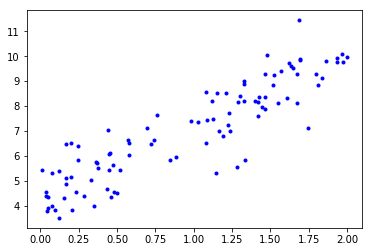

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(X,y, "b.")
plt.show()

In [26]:
X_b=np.c_[np.ones((100,1)), X]
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)


In [27]:
theta_best

array([[4.32466938],
       [2.81975034]])

In [28]:
X_new= np.array([[0],[2]])
X_new_b=np.c_[np.ones((2,1)),X_new]
y_predict=X_new_b.dot(theta_best)
y_predict

array([[4.32466938],
       [9.96417005]])

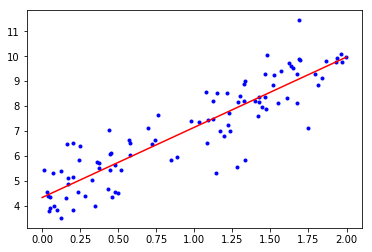

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(X,y, "b.")
plt.plot(X_new,y_predict,'r-')
plt.show()

In [32]:
from sklearn.linear_model import LinearRegression
lr_reg =LinearRegression()
lr_reg.fit(X,y)
lr_reg.intercept_,lr_reg.coef_

(array([4.32466938]), array([[2.81975034]]))

In [33]:
theta_best

array([[4.32466938],
       [2.81975034]])

In [34]:
lr_reg.predict(X_new)

array([[4.32466938],
       [9.96417005]])

In [35]:
y_predict

array([[4.32466938],
       [9.96417005]])

In [63]:
n_epochs=50
t0,t1=5,50

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)
m = 50

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        grad = 2 * xi.T.dot(xi.dot(theta) -yi )
        eta = learning_schedule(epoch*m + i )
        theta = theta - eta * grad
        






In [64]:
theta

array([[4.38904579],
       [2.7345746 ]])

In [65]:
theta_best 

array([[4.32466938],
       [2.81975034]])

In [69]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(eta0=0.1,penalty=None , n_iter=50)

In [71]:
sgd_reg.fit(X,y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.39840926]), array([2.90772428]))

In [74]:
m =100
X=6*np.random.rand(m,1) -3
y=0.5 * X**2 + X + 2 + np.random.randn(m, 1)

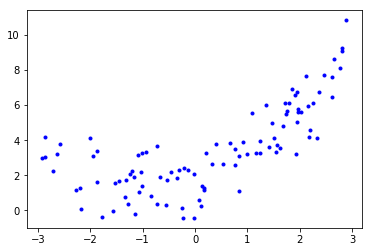

In [78]:
plt.plot(X,y,'b.')
plt.show()

In [79]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly=poly_features.fit_transform(X)

X[0]

array([1.24298021])

In [80]:
X_poly[0]

array([1.24298021, 1.5449998 ])

In [81]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y )
lin_reg.intercept_, lin_reg.coef_

(array([1.83580597]), array([[0.94867815, 0.50641034]]))

In [91]:
pre_x = [[i] for i in range(-3, 4, 1) ]

In [92]:
X_test = poly_features.transform(pre_x)

In [93]:
X_test

array([[-3.,  9.],
       [-2.,  4.],
       [-1.,  1.],
       [ 0.,  0.],
       [ 1.,  1.],
       [ 2.,  4.],
       [ 3.,  9.]])

In [89]:
y_pred = lin_reg.predict(X_test)

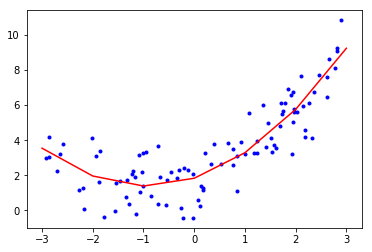

In [97]:
plt.plot(X,y,'b.')
plt.plot(pre_x, y_pred, 'r-')
plt.show()

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [140]:
def plot_learning_curve(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X,y)
    training_error,validation_error=[],[]
    len_y = list(range(1,len(X_train)))
    for i in len_y:
        model.fit(X_train[:i],X_train[:i])
        y_train_pred = model.predict(X_train[:i])
        y_val_pred = model.predict(X_val)
        
        training_error.append(mean_squared_error(y_train[:i], y_train_pred))
        validation_error.append(mean_squared_error(y_val, y_val_pred))
    plt.plot(len_y,np.sqrt(training_error), "r-+", linewidth=2, label="train")
    plt.plot(len_y,np.sqrt(validation_error), "b-", linewidth=3, label="val")

In [127]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2) 
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

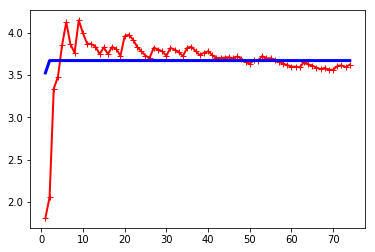

In [138]:
lin_reg = LinearRegression()
plot_learning_curve(lin_reg,X,y)

In [139]:
from sklearn.pipeline import Pipeline
poly_reg = Pipeline([
    ('poly_feature' , PolynomialFeatures(degree=10,include_bias=False)),
    ('sgd_reg', LinearRegression())
])

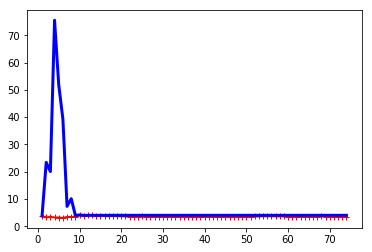

In [142]:
plot_learning_curve(poly_reg,X,y)

In [143]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1,solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[4.76665068]])

In [144]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])


/Users/Kunal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([4.11497859])

In [145]:
from sklearn import datasets
iris = datasets.load_iris()

In [146]:
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [147]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [162]:
X=iris['data'][:,3:]
y=(iris['target'] == 2).astype(int)

In [163]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

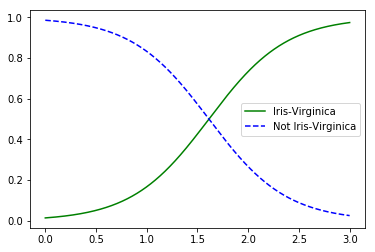

In [166]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_prob = log_reg.predict_proba(X_new)
plt.plot(X_new, y_prob[:, 1], "g-", label="Iris-Virginica") 
plt.plot(X_new, y_prob[:, 0], "b--", label="Not Iris-Virginica")
plt.legend()

In [167]:
log_reg.classes_

array([0, 1])

In [168]:
X=iris['data'][:,(2,3)]
y=iris['target']

In [170]:
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [172]:
softmax_reg.predict([[5,2]])

array([2])

In [177]:
softmax_reg.predict_proba([[5,2]])

array([[6.33134077e-07, 5.75276067e-02, 9.42471760e-01]])

In [179]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [180]:
y[:5]

array([0, 0, 0, 0, 0])

In [182]:
setosa=X[y==0]
versicolor=X[y==1]
virginica=X[y==2]

Text(0,0.5,'petal width (cm)')

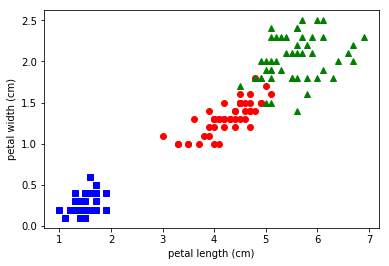

In [204]:
plt.plot(setosa[:,0],setosa[:,1],'bs')
plt.plot(versicolor[:,0],versicolor[:,1],'ro')
plt.plot(virginica[:,0],virginica[:,1],'g^')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')